In [244]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [259]:
t = np.arange(0,2.42,1e-4)

def Movement(t):
    
    h = t[1]-t[0]
    G = 4*np.pi**2
    
    r0 = np.array([0.387098*(1+0.205630),0.])
    v0 = np.array([0.,np.sqrt(G*(1-0.205630) / r0[0])])
    a0 = -G/np.linalg.norm(r0)**3 * r0
    
    R = np.zeros( (len(t),len(r0)) )
    V = np.zeros_like(R)
    A = np.zeros_like(R)
    
    R[0] = r0
    V[0] = v0
    A[0] = a0
           
    for i in tqdm(range(1,len(t))):
        R[i] = R[i-1] + V[i-1]*h + 0.5*A[i-1]*h**2
        A[i] = -G/np.linalg.norm(R[i])**3 * R[i]
        V[i] = V[i-1] + 0.5*h*(A[i]+A[i-1])
    
    return R,A,V
    

In [260]:
R,A,V = Movement(t)

100%|█████████████████████████████████████████████████████████████████████████| 24199/24199 [00:01<00:00, 21665.04it/s]


In [286]:
Dist = np.linalg.norm(R,axis=1)
t_ph = []
angulo = []

for i in tqdm(range(1,len(Dist)-1)):
    if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
        t_ph.append(t[i])
        ang = np.arctan2(R[i][1],R[i][0])*(180/np.pi)*(3600/1000)
        angulo.append(np.abs(ang)) # ESTOY CALCULANDO MAL EL ANGULO
        

100%|████████████████████████████████████████████████████████████████████████| 24198/24198 [00:00<00:00, 417836.62it/s]


In [287]:
t_ph,angulo

([0.12040000000000001,
  0.3613,
  0.6021000000000001,
  0.8429000000000001,
  1.0838,
  1.3246,
  1.5655000000000001,
  1.8063,
  2.0472,
  2.2880000000000003],
 [647.8254745898056,
  647.6890418660785,
  647.961907341325,
  647.6128565792872,
  647.9016599020545,
  647.7492892831699,
  647.7652271629888,
  647.8857220250928,
  647.6287944642824,
  647.9778452177313])

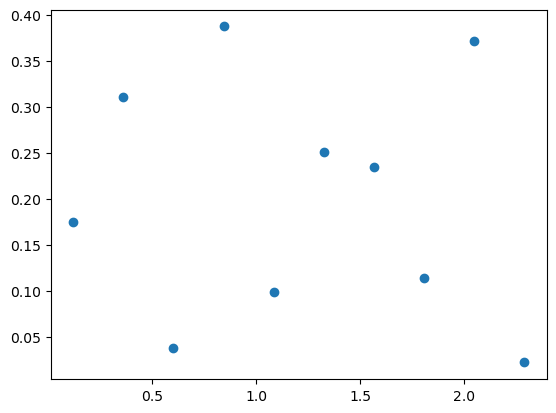

In [279]:
plt.scatter(t_ph,angulo)